**Librerias necesarias**

In [0]:
import h5py #Cargar datos
import numpy as np #Manejo matrices
import matplotlib.pyplot as plt #Mostrar datos, tambien se usa seaborn

**Cargar datos, unirlos y adaptarlos para CNN**

In [0]:
#Abrir datos
h5f = h5py.File('datos.h5', 'r')
#Cargamos los datos de entrenamiento y extra para juntarlo 
x_train = h5f['x_train'][:]
x_extra = h5f['x_extra'][:]
h5f.close()

In [3]:
print(x_train.shape) #Numero de x_train 
x_train = np.concatenate((x_train,x_extra), axis=0)
x_train.shape #Aumenta dependiendo de los datos de x_extra

(73257, 32, 32)


(373257, 32, 32)

In [0]:
del x_extra #Limpiar memoria
#Cargar el resto de los datos necesarios
h5f = h5py.File('datos.h5', 'r')
y_train = h5f['y_train'][:]
#Datos de test
x_test = h5f['x_test'][:]
y_test = h5f['y_test'][:]
y_extra = h5f['y_extra'][:]

h5f.close()

In [5]:
y_train = np.concatenate((y_train,y_extra), axis=0) #Unir variables dependiente
print(y_train.shape)
del y_extra #Limpiar mempria

(373257, 10)


In [0]:
#Agregar dimension de canal
x_train=np.expand_dims(x_train, axis=3).astype('float32')
x_test=np.expand_dims(x_test, axis=3).astype('float32')

**Creación de red convolucional**

In [7]:
from keras import models
from keras import layers
cnn = models.Sequential() 

cnn.add(layers.Conv2D(10, (5, 5), activation='relu', input_shape=(32,32,1)))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Conv2D(20, (5, 5), activation='relu'))
cnn.add(layers.MaxPooling2D((2, 2)))

# Clasificador
cnn.add(layers.Flatten())
cnn.add(layers.Dense(100, activation='relu'))

# Neurona de salida
cnn.add(layers.Dense(10, activation='softmax'))

#Definimor el optmizador,la metricas para test/train y la funcion de perdida
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])

resultado = cnn.fit(x_train, y_train, epochs=3, verbose=1, batch_size=64, validation_data=(x_test, y_test))

Using TensorFlow backend.


Train on 373257 samples, validate on 26032 samples
Epoch 1/3
373257/373257 [==============================] - 420s 1ms/step - loss: 0.3249 - acc: 0.9075 - val_loss: 0.3824 - val_acc: 0.8931
Epoch 2/3
373257/373257 [==============================] - 422s 1ms/step - loss: 0.1904 - acc: 0.9462 - val_loss: 0.3095 - val_acc: 0.9128
Epoch 3/3
373257/373257 [==============================] - 420s 1ms/step - loss: 0.1619 - acc: 0.9546 - val_loss: 0.3041 - val_acc: 0.9185


In [12]:
#Comprobacacion de error
print ("Resultado de acc en test:",resultado.history['val_acc'])

Resultado de acc en test: [0.8931315304607281, 0.9127612169271022, 0.9184849415736911]


**Matriz de confusión con datos**

In [0]:
from sklearn.metrics import confusion_matrix
#Devuelve un numpy array con la prediccion 
y_pred = cnn.predict(x_test)
y_pred = np.argmax(y_pred,axis = 1) 
#Agarra el valor del one hot encoder
y_real = np.argmax(y_test,axis = 1) 
#Calculo de matrix de confusion
matrix = confusion_matrix(y_real, y_pred)

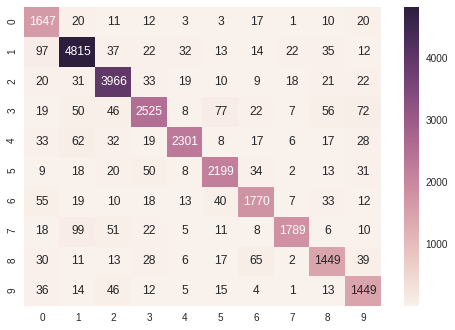

In [14]:
#Matriz de confusion
import seaborn as sns
plt.figure()
sns.heatmap(matrix, annot=True, fmt="d");

**Visualizar imagenes con predicción incorrecta**

In [15]:
#Predicción incorrecta: Boolean que compara la prediccion con el valor real
inc_pred = (y_pred != y_real) #Verdaderos son incorrectos
print('Total de predicciones incorrectas:',np.sum(inc_pred))

#https://stackoverflow.com/questions/21448225/getting-indices-of-true-values-in-a-boolean-list 
#Tomamos la posicion de todos los verderos que son los incorrectos
errores = [i for i, x in enumerate(inc_pred) if x]

Total de predicciones incorrectas: 2122


**Visualización (Predicción incorrecta):**

In [0]:
#Visualizar:
#            x:Variables independientes
#            y:Predicciones del modelo
#            yr:Valor real de y
#            lista:Lista con aciertos o errores
def visualizar(x,y,yr,fila,columna,lista):
    img, axes = plt.subplots(fila, columna) #Configuramos la figura 
    for i,j in enumerate(axes.flatten()): # Devuelve un vector numpy para poder iterarlo 
        j.imshow(x[lista[i],:,:,0])        
        j.set_xticks([])
        j.set_yticks([])
        #k = "Prediccion:"+str(y[lista[i]])+ "/ Real: "+str(yr[lista[i]])
        k = str(y[lista[i]])+ " | "+str(yr[lista[i]])
        j.set_title(k)
        
    img.tight_layout()

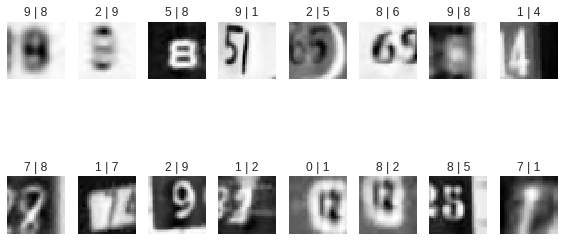

In [17]:
visualizar(x_test,y_pred,y_real,2,8,errores)

**Gráficas de perdida y accuracy**

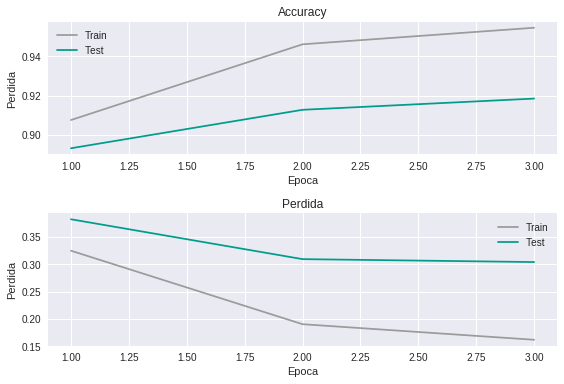

In [18]:
#Imprimir gráficas de CNN
#En la CNN devuelve un objeto resultado.history, agarramos datos para plot
loss = resultado.history['loss']
val_loss = resultado.history['val_loss']
acc = resultado.history['acc']
val_acc = resultado.history['val_acc']
epoca = range(1, len(loss) + 1)

fig2 = plt.figure()
plt.subplot(2,1,1)
plt.plot(epoca, acc, color='#9b9b9b', label='Train')
plt.plot(epoca, val_acc, color='#009C8C', label='Test')
plt.title('Accuracy')
plt.xlabel('Epoca')
plt.ylabel('Perdida')
plt.legend()

plt.subplot(2,1,2)
plt.plot(epoca, loss, color='#9b9b9b', label='Train')
plt.plot(epoca, val_loss, color='#009C8C', label='Test')
plt.title('Perdida')
plt.xlabel('Epoca')
plt.ylabel('Perdida')
plt.legend()

plt.tight_layout()


**Extra (opcional) Predicciones correctas:**

Total de predicciones correctas: 23910


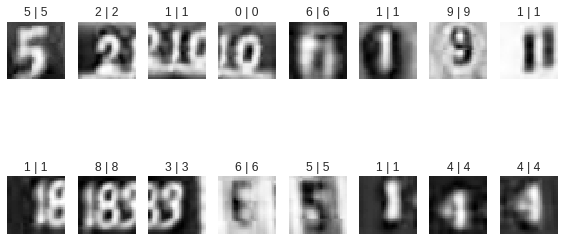

In [19]:
pred_reales = (y_pred == y_real)
correcto = [i for i, x in enumerate(pred_reales) if x]
print('Total de predicciones correctas:',np.sum(pred_reales))
visualizar(x_test,y_pred,y_real,2,8,correcto)

In [0]:
#Reseteo de variables
%reset